In [1]:
The Impacts of cholester levels has on the serverity of Heart Disease.

Heart disease essentially affects the heart and vessels leading to it, common types of this disease can 
be heart attacks (TIA) and strokes. There are many risk factors that can affect the likelihood of contacting
heart disease such as: cholesteral levels, blood sugar levels, age and there maximun heart rate. These are 
some of the factors are examined in the following data set below which we will be using to answer the following 
question: Do high cholesterol levels have a greater effect on the severity of heart disease in older men than 
older women?

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: The Impacts
        ^


In [6]:
library(tidyverse) 
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)
url <-"https://raw.githubusercontent.com/katelynmilan/DSCI_project/main/processed.cleveland.data"
data_set <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data_set

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [19]:
clean_data <- data_set|> 
select(age, sex, chol, num) |> 
rename(Heart_Disease = num, Cholesterol = chol, Age = age, Sex = sex)|>
mutate(Heart_Disease = as.character(Heart_Disease))   

data_split <- initial_split(clean_data, prop = 0.75, strata = Heart_Disease)
data_train <- training(data_split)
data_test <- testing(data_split)

data_train 



Age,Sex,Cholesterol,Heart_Disease
<dbl>,<dbl>,<dbl>,<chr>
37,1,250,0
41,0,204,0
56,1,236,0
⋮,⋮,⋮,⋮
61,1,166,4
55,0,205,3
57,1,131,3


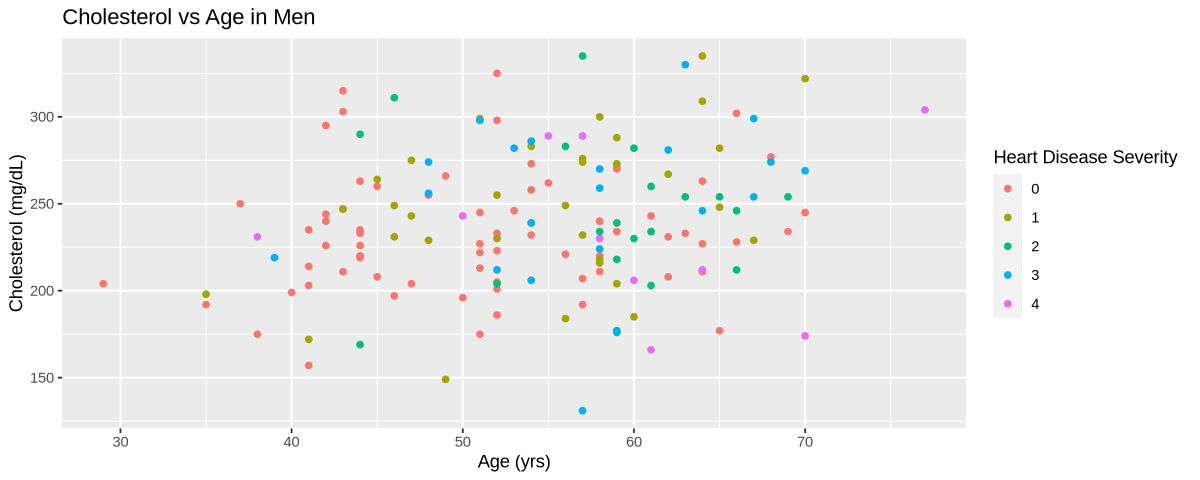

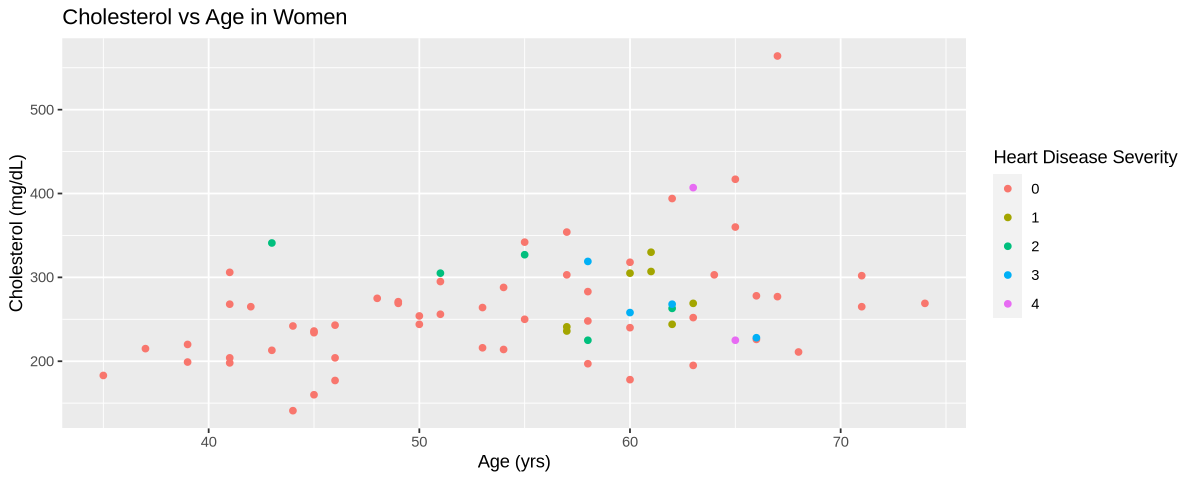

In [16]:


male_data <- filter(data_train, Sex == 1)

female_data <- filter(data_train, Sex == 0)

options(repr.plot.height = 4, repr.plot.width = 10)
male_plot <- ggplot(male_data, aes(x = Age, y = Cholesterol))+
                geom_point(aes(color = Heart_Disease))+
                labs(x = "Age (yrs)", y = "Cholesterol (mg/dL)", color = "Heart Disease Severity")+
                ggtitle("Cholesterol vs Age in Men")

options(repr.plot.height = 4, repr.plot.width = 10)
female_plot <- ggplot(female_data, aes(x = Age, y = Cholesterol))+
                geom_point(aes(color = Heart_Disease))+
                labs(x = "Age (yrs)", y = "Cholesterol (mg/dL)", color = "Heart Disease Severity")+
                ggtitle("Cholesterol vs Age in Women")


male_plot
female_plot

In [17]:
To conduct this data analysis we will use the columns of Age, Sex, Cholesteral and Heart Disease Severity. 
To search for our answer we would first tidy and wrangle all the data so we can perform an anaylysis.
Changing column names and values within the column to characters do the data is easier to read to the human eye. Then we will prefrom K nearest neighbor classification to answer our question. We will visulize our results 
using 2 scatter plots . Each one will represent a sex, age will be on the x axis and cholesteral level will be 
on the y axis. Lastly we will use different coloured points to show the different levels of heart disease severity. 
We will predict the value using classifcation on out created graph to classify it.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: To conduct
       ^


In [ ]:
Within our data we expect to find the older aged males with higherlevels of cholesterol
will have more serve heart disease conditions. These impacts could affect the daily food choice of 
seniors so they are more conicous in their cholesteral intake to prevent heart disease from occuring. 
This finding could lead to futher questions such as what other factors affect heart diseases and what is 
considered an abnormal intake of cholesteral that can result in heart diseases.